In [1057]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import tensorflow as tf

In [1058]:
data = pd.read_csv('/Users/rahulnair/Desktop/Labelmaster_/Sales_Data/Books_ext_fs.csv')
data

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,...,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x"
0,2008-01,282604.11,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,99.755501,114.408275,...,969.0,-2981.0,1156094.0,3.341993,557011.0,46969.0,1.035742e+06,428531.270000,90322.590000,70230.000000
1,2008-02,262474.40,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,99.755501,114.867841,...,1104.0,-13327.0,1088826.0,2.285576,501961.0,44924.0,1.138045e+06,478707.330000,100410.660000,86567.000000
2,2008-03,326059.68,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,100.488998,117.070858,...,1158.0,-9852.0,1082825.0,1.924076,481100.0,46727.0,1.167742e+06,500866.450000,93384.280000,80451.000000
3,2008-04,215387.49,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,101.589242,122.811123,...,931.0,-733.0,1158286.0,5.986521,528843.0,53497.0,1.156788e+06,486063.840000,101642.940000,84739.000000
4,2008-05,499559.90,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,101.314181,123.968232,...,991.0,6890.0,1184144.0,7.940801,541259.0,53653.0,1.185090e+06,490618.980000,105424.640000,89548.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-07,150348.10,61469.059874,89.962431,4379.187334,6571.127779,2639.040651,115.128696,102.231051,113.578198,...,1359.0,2134.0,1526490.0,-0.192121,513074.0,57503.0,1.095134e+06,393775.832112,125276.157772,103172.000000
151,2020-08,156066.95,62140.797176,90.641835,4404.415547,6601.260917,2676.666422,129.107598,104.339853,115.812566,...,1671.0,1353.0,1575928.0,0.625716,546740.0,56478.0,1.108304e+06,389408.103791,125319.157772,93979.000000
152,2020-09,468710.96,62170.174317,90.587889,4381.188114,6556.745680,2600.808117,136.100117,105.898533,117.464895,...,1711.0,-7196.0,1617044.0,5.475578,557748.0,59269.0,1.099329e+06,386298.700253,117576.128306,103129.000000
153,2020-10,1118446.80,62870.759335,94.367218,4436.920215,6523.796564,2593.200335,140.122763,106.265281,117.793788,...,2018.0,-10130.4,1705714.0,9.817290,591616.0,60708.0,1.186353e+06,410614.677268,123604.184721,105255.000000


In [1059]:
# setting 'Year_Month' as index
data['Year_Month'] = pd.to_datetime(data['Year_Month'], infer_datetime_format=True)
data = data.set_index(data['Year_Month'])
cols = data.columns[1:]
data = data[cols].astype(float)
data

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Total LTL (w/o FSC)_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,...,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x"
Year_Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,282604.11,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,99.755501,114.408275,99.995901,...,969.0,-2981.0,1156094.0,3.341993,557011.0,46969.0,1.035742e+06,428531.270000,90322.590000,70230.000000
2008-02-01,262474.40,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,99.755501,114.867841,100.276486,...,1104.0,-13327.0,1088826.0,2.285576,501961.0,44924.0,1.138045e+06,478707.330000,100410.660000,86567.000000
2008-03-01,326059.68,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,100.488998,117.070858,99.727612,...,1158.0,-9852.0,1082825.0,1.924076,481100.0,46727.0,1.167742e+06,500866.450000,93384.280000,80451.000000
2008-04-01,215387.49,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,101.589242,122.811123,99.057287,...,931.0,-733.0,1158286.0,5.986521,528843.0,53497.0,1.156788e+06,486063.840000,101642.940000,84739.000000
2008-05-01,499559.90,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,101.314181,123.968232,97.828232,...,991.0,6890.0,1184144.0,7.940801,541259.0,53653.0,1.185090e+06,490618.980000,105424.640000,89548.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,150348.10,61469.059874,89.962431,4379.187334,6571.127779,2639.040651,115.128696,102.231051,113.578198,115.191063,...,1359.0,2134.0,1526490.0,-0.192121,513074.0,57503.0,1.095134e+06,393775.832112,125276.157772,103172.000000
2020-08-01,156066.95,62140.797176,90.641835,4404.415547,6601.260917,2676.666422,129.107598,104.339853,115.812566,114.911925,...,1671.0,1353.0,1575928.0,0.625716,546740.0,56478.0,1.108304e+06,389408.103791,125319.157772,93979.000000
2020-09-01,468710.96,62170.174317,90.587889,4381.188114,6556.745680,2600.808117,136.100117,105.898533,117.464895,115.470202,...,1711.0,-7196.0,1617044.0,5.475578,557748.0,59269.0,1.099329e+06,386298.700253,117576.128306,103129.000000


In [1060]:
for i in data.columns:
    if data.isnull().sum()[i] >= 1:
        print(i, data.isnull().sum()[i])

CASS_indicators_m_trucking 1
ISRATIO_indicators_m_trucking 1
NDCGO_indicators_m_trucking 1
CF3M_indicators_m_trucking 1
PUBCON_indicators_m_trucking 1
Total Class 8, North America_OEM Net Orders_indicators_m_trucking_trailer 3
Total Class 8, North America_OEM Net Orders_M/M % Change_indicators_m_trucking_trailer 4
Total Class 8, North America_OEM Net Orders_Y/Y % Change_indicators_m_trucking_trailer 15


In [1061]:
data = data.drop(['CASS_indicators_m_trucking', 'ISRATIO_indicators_m_trucking', 
                  'NDCGO_indicators_m_trucking', 'CF3M_indicators_m_trucking', 
                 'PUBCON_indicators_m_trucking', 
                 'Total Class 8, North America_OEM Net Orders_indicators_m_trucking_trailer', 
                 'Total Class 8, North America_OEM Net Orders_M/M % Change_indicators_m_trucking_trailer', 
                 'Total Class 8, North America_OEM Net Orders_Y/Y % Change_indicators_m_trucking_trailer'], axis=1)

In [1062]:
data.shape

(155, 71)

In [1063]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[ 0.06944129,  0.30107966, -0.40903828, ..., -0.24847077,
        -1.2351139 , -1.98826439],
       [-0.06388479,  0.21448922, -0.47320628, ...,  0.98880211,
        -0.59357489, -0.81291369],
       [ 0.35726268,  0.14623792, -0.51831502, ...,  1.53521565,
        -1.04040931, -1.25292378],
       ...,
       [ 1.30209182,  1.1588675 ,  0.08769061, ..., -1.28986807,
         0.49804297,  0.37862444],
       [ 5.60551871,  1.29133629,  0.90631567, ..., -0.69026939,
         0.88139016,  0.53157758],
       [ 1.04017687,  1.36059139,  1.13107458, ..., -1.79222855,
         1.32801313,  0.35538404]])

In [1064]:
features = scaled_data
target = scaled_data[:, 0]

In [1065]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=121003, shuffle=False)
print('Train data shape: ', X_train.shape)
print('Test data shape: ', X_test.shape)

Train data shape:  (108, 71)
Test data shape:  (47, 71)


In [1066]:
# Creating window for training
window_length = 12
batch_size = 10
num_features = 71
train_generator = TimeseriesGenerator(X_train, y_train, length=window_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=window_length, sampling_rate=1, batch_size=batch_size)

In [1067]:
# define LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=512, input_shape=(window_length, num_features), return_sequences=True))
# model.add(tf.keras.layers.LSTM(units=512, return_sequences=True))
model.add(tf.keras.layers.LSTM(units=256, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(units=1))





# model = Sequential()
    
# model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=5,
#                           strides=1, padding="causal",
#                           activation="tanh",
#                           input_shape=(window_length, num_features)))
 
# model.add(tf.keras.layers.LSTM(512, activation = 'tanh', dropout=0.25, recurrent_dropout= 0.25, return_sequences=True))

# model.add(tf.keras.layers.LSTM(512, dropout=0.25, recurrent_dropout= 0.25, activation = 'tanh', return_sequences=True))
# model.add(tf.keras.layers.LSTM(512,  activation = 'tanh'))
    
# model.add(tf.keras.layers.Dense(100))
# model.add(tf.keras.layers.Dense(1))

# model summary
model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_119 (LSTM)              (None, 12, 512)           1196032   
_________________________________________________________________
lstm_120 (LSTM)              (None, 256)               787456    
_________________________________________________________________
dropout_58 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 257       
Total params: 1,983,745
Trainable params: 1,983,745
Non-trainable params: 0
_________________________________________________________________


In [1068]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')

# Compiling the Neural Network
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.1), loss=tf.losses.MeanSquaredError(), 
             metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50, validation_data=test_generator, shuffle=False, 
                             callbacks=[early_stopping])

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


10/10 [==============================] - 6s 152ms/step - loss: 101.8016 - mean_absolute_error: 7.4859 - val_loss: 16.5728 - val_mean_absolute_error: 3.8439
Epoch 2/50
10/10 [==============================] - 1s 77ms/step - loss: 24.9109 - mean_absolute_error: 4.5478 - val_loss: 20.5221 - val_mean_absolute_error: 4.3823
Epoch 3/50
10/10 [==============================] - 1s 77ms/step - loss: 18.2227 - mean_absolute_error: 3.8708 - val_loss: 2.4639 - val_mean_absolute_error: 1.0221
Epoch 4/50
10/10 [==============================] - 1s 87ms/step - loss: 6.7500 - mean_absolute_error: 2.1362 - val_loss: 10.8219 - val_mean_absolute_error: 3.0075
Epoch 5/50
10/10 [==============================] - 1s 91ms/step - loss: 4.0747 - mean_absolute_error: 1.6585 - val_loss: 4.5511 - val_mean_absolute_error: 1.6863
Epoch 6/50
10/10 [==============================] - 1s 76ms/step - loss: 1.5773 - mean_absolute_error: 0.9239 - val_loss: 1.7872 - val_mean_absolute_error: 1.0534
Epoch 7/50
10/10 [=======

In [1069]:
model.evaluate_generator(test_generator, verbose=0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[9.001093864440918, 2.3951053619384766]

In [1070]:
predictions = model.predict_generator(test_generator)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [1071]:
X_test.shape

(47, 71)

In [1072]:
X_test[:, 1:][window_length:].shape

(35, 70)

In [1073]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(X_test[:, 1:][window_length:])], axis=1)

In [1074]:
df_pred

,0,0,1,2,3,4,5,6,7,8,...,60,61,62,63,64,65,66,67,68,69
0,-0.898309,1.217702,2.034208,0.897869,0.992753,0.793134,2.249984,0.756571,0.549400,0.678498,...,0.057859,-0.651074,0.924008,1.310868,0.805280,0.631277,-0.701571,-0.611014,-0.449026,-0.521900
1,0.888961,1.555059,2.110605,1.503107,1.177905,1.109705,1.784094,0.585482,0.382076,0.803758,...,0.520812,-0.378216,0.651583,1.160638,0.380397,0.421131,0.248682,0.018984,0.630988,-0.204267
2,1.989207,1.429326,2.126409,1.208060,1.079040,1.026637,1.831483,0.717089,0.552751,0.953105,...,0.583133,-1.190161,1.279470,1.309654,0.715782,1.415866,2.082999,1.052422,1.602866,1.544263
3,0.501698,1.508881,1.841589,1.291935,1.281113,1.217247,1.936741,0.835535,0.733815,1.561905,...,0.597971,-1.422536,0.883797,1.419799,0.447113,0.710658,1.762810,0.637317,1.451591,1.089000
4,-2.077440,1.474810,1.672040,1.310263,1.362888,1.337696,1.872059,0.875017,0.797617,1.091683,...,0.283400,-0.787502,1.552822,0.396229,1.234963,0.836925,1.873521,0.561441,1.798895,1.793405
5,-3.626676,1.404385,1.831397,1.107666,1.339988,1.288236,2.184684,1.019784,0.968159,1.427343,...,1.019377,0.735543,1.416661,-0.119518,1.124180,0.504223,1.176577,0.054409,1.160938,1.538147
6,0.397846,1.407644,0.987766,1.486102,1.419324,1.414195,1.922612,0.993463,0.925323,1.492240,...,0.654356,0.954808,1.322184,-0.057291,1.130624,0.419557,0.501929,-0.236689,0.891486,0.668343
7,-1.125215,1.467480,1.152581,1.327472,1.319305,1.193701,1.523220,1.085587,1.027549,1.602693,...,1.185566,0.703272,1.944570,-0.010401,1.594267,0.782730,0.481820,-0.177202,0.891693,0.259053
8,-1.951890,1.482946,1.180970,1.120510,1.365817,1.183038,1.210793,1.125069,1.071558,1.736849,...,0.897704,0.712925,1.113194,0.051796,0.633169,0.274176,0.237399,-0.187929,0.555679,1.128066
9,-0.901034,1.420152,0.193820,1.186071,1.184254,0.955441,0.886900,1.138230,1.118637,1.823063,...,1.509039,-1.865821,1.852621,-0.068554,1.174130,0.732696,1.272368,0.223862,1.410597,1.383108


In [1075]:
reverse_scale = scaler.inverse_transform(df_pred)

In [1076]:
reverse_scale

array([[1.36492190e+05, 6.24813335e+04, 9.95743369e+01, ...,
        4.13828792e+05, 1.02683656e+05, 9.06120000e+04],
       [4.06336018e+05, 6.42655062e+04, 9.99270363e+01, ...,
        4.39377581e+05, 1.19666668e+05, 9.50270000e+04],
       [5.72452343e+05, 6.36005423e+04, 1.00000000e+02, ...,
        4.81287365e+05, 1.34949252e+05, 1.19331000e+05],
       ...,
       [1.16866608e+06, 6.21701743e+04, 9.05878886e+01, ...,
        3.86298700e+05, 1.17576128e+05, 1.03129000e+05],
       [9.05623696e+05, 6.28707593e+04, 9.43672184e+01, ...,
        4.10614677e+05, 1.23604185e+05, 1.05255000e+05],
       [9.27909819e+05, 6.32370274e+04, 9.54048583e+01, ...,
        3.65926097e+05, 1.30627240e+05, 1.02805966e+05]])

In [1077]:
df_final = data[predictions.shape[0]*-1:]

In [1078]:
df_final['Predicted_Sales'] = reverse_scale[:, 0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


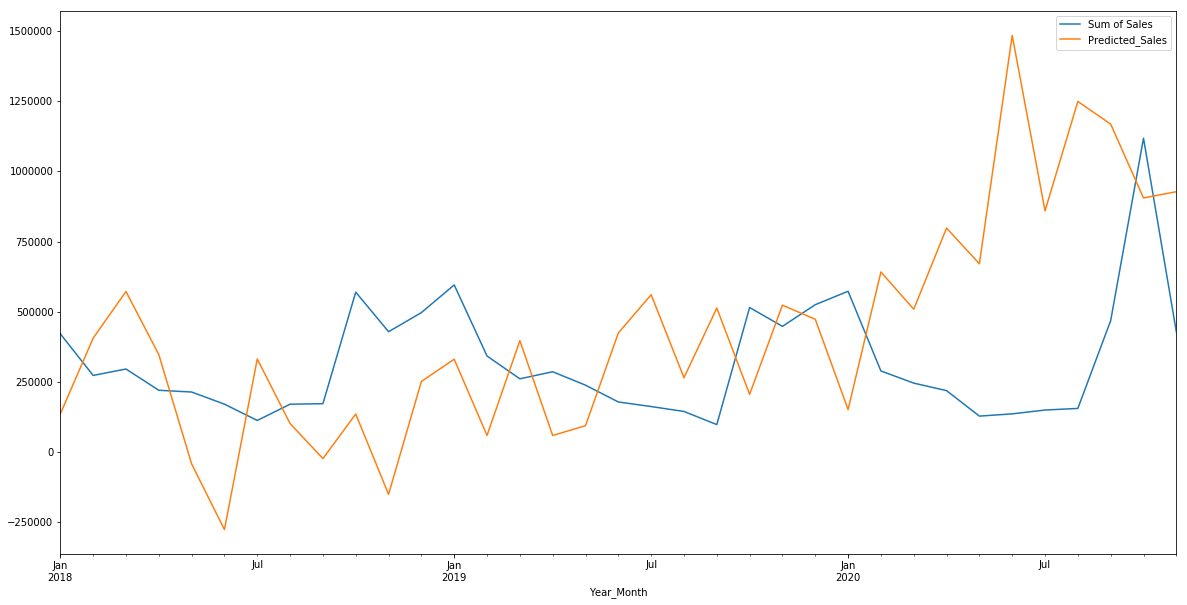

In [1079]:
df_final[['Sum of Sales', 'Predicted_Sales']].plot()

### Seems like LSTM model is really ineffective for this.